In [11]:
import heapq
import random
import networkx as nx
import osmnx as ox
import matplotlib.pyplot as plt
from geopy.distance import geodesic

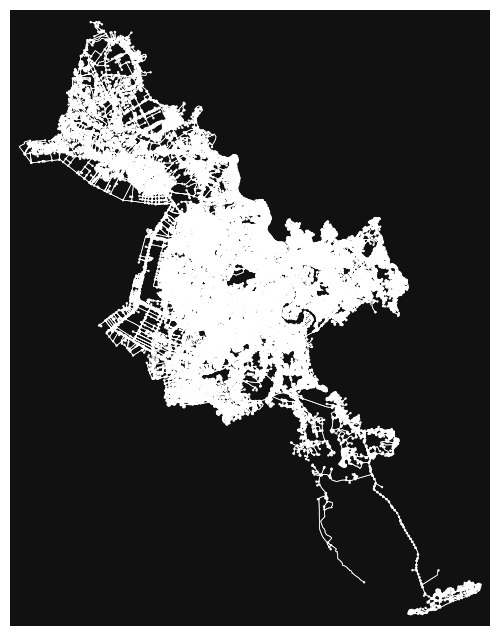

In [5]:
# ---------- Load Ho Chi Minh City graph ----------
G = ox.graph_from_place('Ho Chi Minh City, Vietnam', network_type='drive')
G = ox.add_edge_speeds(G)
G = ox.add_edge_travel_times(G)
ox.plot_graph(G, node_size=3, edge_color='white', edge_linewidth=0.5)
plt.show()

In [12]:
# ---------- Heuristic ----------
def heuristic(a, b):
    coord_a = (G.nodes[a]['y'], G.nodes[a]['x'])
    coord_b = (G.nodes[b]['y'], G.nodes[b]['x'])
    base = geodesic(coord_a, coord_b).meters
    noise = random.uniform(-0.1 * base, 0.1 * base)  # ±10% noise
    return base + noise

In [14]:
# ---------- Path Reconstruction ----------
def reconstruct_path(came_from, current):
    path = [current]
    while current in came_from:
        current = came_from[current]
        path.append(current)
    path.reverse()
    return path

In [15]:
# ---------- A* Algorithm ----------
def astar(G, start, goal):
    open_set = []
    heapq.heappush(open_set, (0, start))
    came_from = {}

    g_score = {node: float('inf') for node in G.nodes}
    g_score[start] = 0

    f_score = {node: float('inf') for node in G.nodes}
    f_score[start] = heuristic(start, goal)

    while open_set:
        _, current = heapq.heappop(open_set)

        if current == goal:
            return reconstruct_path(came_from, current)

        for neighbor in G.neighbors(current):
            edge_data = G.get_edge_data(current, neighbor)[0]
            tentative_g = g_score[current] + edge_data['length']
            if tentative_g < g_score[neighbor]:
                came_from[neighbor] = current
                g_score[neighbor] = tentative_g
                f_score[neighbor] = tentative_g + heuristic(neighbor, goal)
                heapq.heappush(open_set, (f_score[neighbor], neighbor))
    return None

In [17]:
# ---------- Select random nodes ----------
random.seed(42)  # For reproducibility
nodes = list(G.nodes)
start = random.choice(nodes)
goal = random.choice(nodes)

print(f"Start node: {start}, Goal node: {goal}")

Start node: 5762773560, Goal node: 7400553519


Path found with 394 nodes.


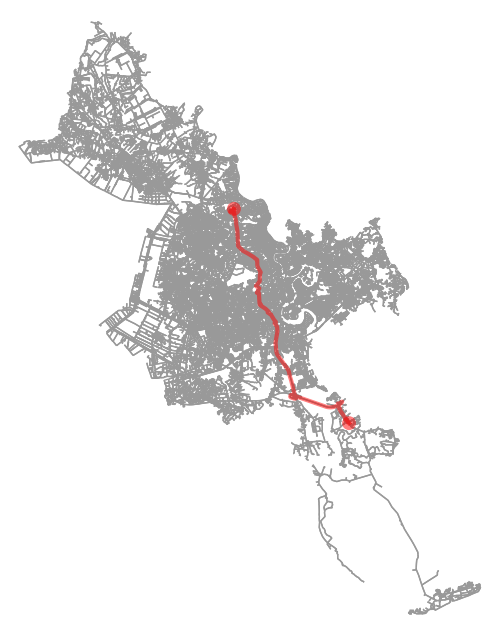

In [18]:
# ---------- Run A* ----------
path = astar(G, start, goal)
if path:
    print(f"Path found with {len(path)} nodes.")
    ox.plot_graph_route(G, path, route_linewidth=3, node_size=0, bgcolor='white')
else:
    print("No path found.")